# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/datasets/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# lower case and snake_case column names

In [4]:
df.columns = df.columns.str.lower() 

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [7]:
df = df.reindex(sorted(df.columns), axis=1)

# Handle null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st_flr_sf       2051 non-null   int64  
 1   2nd_flr_sf       2051 non-null   int64  
 2   3ssn_porch       2051 non-null   int64  
 3   alley            140 non-null    object 
 4   bedroom_abvgr    2051 non-null   int64  
 5   bldg_type        2051 non-null   object 
 6   bsmt_cond        1996 non-null   object 
 7   bsmt_exposure    1993 non-null   object 
 8   bsmt_full_bath   2049 non-null   float64
 9   bsmt_half_bath   2049 non-null   float64
 10  bsmt_qual        1996 non-null   object 
 11  bsmt_unf_sf      2050 non-null   float64
 12  bsmtfin_sf_1     2050 non-null   float64
 13  bsmtfin_sf_2     2050 non-null   float64
 14  bsmtfin_type_1   1996 non-null   object 
 15  bsmtfin_type_2   1995 non-null   object 
 16  central_air      2051 non-null   object 
 17  condition_1   

In [9]:
df.columns

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air',
       'condition_1', 'condition_2', 'electrical', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence',
       'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional',
       'garage_area', 'garage_cars', 'garage_cond', 'garage_finish',
       'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating', 'heating_qc', 'house_style', 'id',
       'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope',
       'lot_area', 'lot_config', 'lot_frontage', 'lot_shape',
       'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature',
       'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood',
       

In [10]:
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,bsmt_qual,bsmt_unf_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmtfin_type_1,bsmtfin_type_2,central_air,condition_1,condition_2,electrical,enclosed_porch,exter_cond,exter_qual,exterior_1st,exterior_2nd,fence,fireplace_qu,fireplaces,foundation,full_bath,functional,garage_area,garage_cars,garage_cond,garage_finish,garage_qual,garage_type,garage_yr_blt,gr_liv_area,half_bath,heating,heating_qc,house_style,id,kitchen_abvgr,kitchen_qual,land_contour,land_slope,lot_area,lot_config,lot_frontage,lot_shape,low_qual_fin_sf,mas_vnr_area,mas_vnr_type,misc_feature,misc_val,mo_sold,ms_subclass,ms_zoning,neighborhood,open_porch_sf,overall_cond,overall_qual,paved_drive,pid,pool_area,pool_qc,roof_matl,roof_style,sale_type,saleprice,screen_porch,street,total_bsmt_sf,totrms_abvgrd,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,289.0,BrkFace,NaN,0,3,60,RL,Sawyer,44,8,6,Y,533352170,0,NaN,CompShg,Gable,WD,130500,0,Pave,725.0,6,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,132.0,BrkFace,NaN,0,4,60,RL,SawyerW,74,5,7,Y,531379050,0,NaN,CompShg,Gable,WD,220000,0,Pave,913.0,8,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,0.0,None,NaN,0,1,20,RL,NAmes,52,7,5,Y,535304180,0,NaN,CompShg,Gable,WD,109000,0,Pave,1057.0,5,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,0.0,None,NaN,0,4,60,RL,Timber,0,5,5,Y,916386060,0,NaN,CompShg,Gable,WD,174000,0,Pave,384.0,7,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,0.0,None,NaN,0,3,50,RL,SawyerW,59,8,6,N,906425045,0,NaN,CompShg,Gable,WD,138500,0,Pave,676.0,6,AllPub,0,1900,1993,2010


In [11]:
df['ms_subclass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: ms_subclass, dtype: int64

In [12]:
sub_1st = ['saleprice', '1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'bsmt_unf_sf', 
             'garage_area', 'gr_liv_area', 'lot_area',
             'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual', 'total_bsmt_sf', 'totrms_abvgrd', 
              'year_built']

# Clean-up and EDA

In [13]:
sub_1st = df[sub_1st]

In [14]:
sub_1st.isnull().sum()

saleprice        0
1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     1
bsmt_unf_sf      1
garage_area      1
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    1
totrms_abvgrd    0
year_built       0
dtype: int64

In [15]:
#df_can[df_can['bsmtfin_sf_1'].isnull()]
    ## 1327
    
sub_1st[sub_1st['garage_area'].isnull()]

,saleprice,1st_flr_sf,2nd_flr_sf,bsmtfin_sf_1,bsmt_unf_sf,garage_area,gr_liv_area,lot_area,neighborhood,open_porch_sf,overall_cond,overall_qual,total_bsmt_sf,totrms_abvgrd,year_built
1712,150909,942,886,548.0,311.0,NaN,1828,9060,IDOTRR,0,6,5,859.0,6,1923


In [16]:
sub_1st.drop(1327, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
sub_1st.isnull().sum()

saleprice        0
1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      1
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

In [18]:
sub_1st.loc[1712,'garage_area'] = 0

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
sub_1st.loc[1712]

saleprice        150909
1st_flr_sf          942
2nd_flr_sf          886
bsmtfin_sf_1        548
bsmt_unf_sf         311
garage_area           0
gr_liv_area        1828
lot_area           9060
neighborhood     IDOTRR
open_porch_sf         0
overall_cond          6
overall_qual          5
total_bsmt_sf       859
totrms_abvgrd         6
year_built         1923
Name: 1712, dtype: object

In [20]:
sub_1st.isnull().sum()

saleprice        0
1st_flr_sf       0
2nd_flr_sf       0
bsmtfin_sf_1     0
bsmt_unf_sf      0
garage_area      0
gr_liv_area      0
lot_area         0
neighborhood     0
open_porch_sf    0
overall_cond     0
overall_qual     0
total_bsmt_sf    0
totrms_abvgrd    0
year_built       0
dtype: int64

In [21]:
# Make a copy of sub_1st_bd

sub_1st_bd = sub_1st.copy()

# Dummify neighborbood

n_dummies = pd.get_dummies(sub_1st[['neighborhood']], drop_first = True)

n_dummies.head(2)

sub_1st_ad = pd.concat([sub_1st, n_dummies], axis = 1)

sub_1st_ad.head()

In [23]:
sub_1st.drop(columns = 'neighborhood').head()

,saleprice,1st_flr_sf,2nd_flr_sf,bsmtfin_sf_1,bsmt_unf_sf,garage_area,gr_liv_area,lot_area,open_porch_sf,overall_cond,overall_qual,total_bsmt_sf,totrms_abvgrd,year_built
0,130500,725,754,533.0,192.0,475.0,1479,13517,44,8,6,725.0,6,1976
1,220000,913,1209,637.0,276.0,559.0,2122,11492,74,5,7,913.0,8,1996
2,109000,1057,0,731.0,326.0,246.0,1057,7922,52,7,5,1057.0,5,1953
3,174000,744,700,0.0,384.0,400.0,1444,9802,0,5,5,384.0,7,2006
4,138500,831,614,0.0,676.0,484.0,1445,14235,59,8,6,676.0,6,1900


In [24]:
sub_1st.reset_index(drop = True, inplace = True)

# Define Feature Matrix & Target

In [26]:
list(sub_1st.columns)

['saleprice',
 '1st_flr_sf',
 '2nd_flr_sf',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 'garage_area',
 'gr_liv_area',
 'lot_area',
 'neighborhood',
 'open_porch_sf',
 'overall_cond',
 'overall_qual',
 'total_bsmt_sf',
 'totrms_abvgrd',
 'year_built']

In [27]:
features = ['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'bsmt_unf_sf', 'garage_area', 'gr_liv_area','lot_area',
            'open_porch_sf', 'overall_cond', 'overall_qual', 'total_bsmt_sf',
            'totrms_abvgrd', 'year_built']

In [29]:
y = sub_1st['saleprice']
X = sub_1st[features]

#### Train-Test-Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 308)

#### Instantiate, Fit, Score Model

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr.score(X_train, y_train)

0.8245124086786827

In [34]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8245124086786827, 0.7446517453390047)

In [35]:
list(zip(X.columns, lr.coef_))

[('1st_flr_sf', 35.563560781446625),
 ('2nd_flr_sf', 31.768453343451842),
 ('bsmtfin_sf_1', 16.455588898169793),
 ('bsmt_unf_sf', -8.47518663154951),
 ('garage_area', 41.36269952138521),
 ('gr_liv_area', 16.674788355524452),
 ('lot_area', 0.7878647208924326),
 ('open_porch_sf', -5.18991001574276),
 ('overall_cond', 4906.533420831482),
 ('overall_qual', 20287.794739124463),
 ('total_bsmt_sf', 22.466464646402034),
 ('totrms_abvgrd', 140.50384272674938),
 ('year_built', 438.28218402493013)]

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [50]:
df_test = pd.read_csv('../project_2/datasets/test.csv')

In [51]:
df_test.shape

(878, 80)

In [52]:
df_test.columns = df_test.columns.str.lower() 

In [53]:
df_test.columns = df_test.columns.str.replace(' ', '_')

In [54]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [55]:
df_test.shape

(878, 80)

#### Make sure there aren't any nulls in the columns we used in the model:

In [60]:
df_test.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              820
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical 

In [64]:
df_test[['1st_flr_sf', '2nd_flr_sf', 'bsmtfin_sf_1', 'bsmt_unf_sf', 
             'garage_area', 'gr_liv_area', 'lot_area',
             'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual', 'total_bsmt_sf', 'totrms_abvgrd', 
              'year_built']].shape

(878, 14)

In [65]:
X_TEST = df_test[features]

#### Create Predictions

In [66]:
df_test['y_hat'] = lr.predict(X_TEST)

In [67]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,y_hat
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,169882.117158
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,185143.506580
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,209962.486752
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,99387.407283
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,177621.129318


In [71]:
df_test.shape

(878, 81)

# Create first Submission

In [75]:
nars_1st_submission = df_test[['id', 'y_hat']]

# View Correct Submission Format

In [76]:
nars_1st_submission.head()

,id,y_hat
0,2658,169882.117158
1,2718,185143.506580
2,2414,209962.486752
3,1989,99387.407283
4,625,177621.129318


In [77]:
nars_1st_submission.shape

(878, 2)

# Rename columns of the fisrt submission

In [82]:
nars_1st_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [83]:
nars_1st_submission.shape

(878, 2)

In [84]:
nars_1st_submission.head()

,Id,SalePrice
0,2658,169882.117158
1,2718,185143.506580
2,2414,209962.486752
3,1989,99387.407283
4,625,177621.129318


#### Export as a CSV

In [85]:
nars_1st_submission.to_csv('nars_submission.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

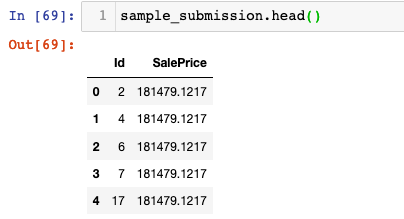